# Named Entity Recognition

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/marketPsych-assignment/1_nlp_task

/content/drive/.shortcut-targets-by-id/1gDrFwBRtXghDoh6D_gW_nKopFj61pAYn/marketPsych-assignment/1_nlp_task


## Task 1

In [1]:
import pandas as pd

with open('sample.txt') as f:
    data = f.readlines()

df = pd.DataFrame(data, columns=['articles'])
print("No. of articles: ", len(df['articles']))

df.drop_duplicates(subset='articles', inplace=True, ignore_index=True)
print("No. of articles after removing duplicate rows: ", len(df['articles']))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
No. of articles:  1870
No. of articles after removing duplicate rows:  1529


In [2]:
df.head()

,articles
0,@fansoniclove Gold the Tenrec\n
1,Tokyo-bound Sampson sets Aust rifle record. Sh...
2,Originally posted by cordingup ↑ I see very in...
3,"""US 500 Futures Discussions. Hey guys what is ..."
4,"Good time to invest in gold?""\n"


In [3]:
print(df['articles'][0])


@fansoniclove Gold the Tenrec



In [4]:
import re

cleaned_articles = []
for a in df['articles']:
    a = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", a).split())
    cleaned_articles.append(a)

df = df.assign(cleaned=cleaned_articles)

df.head()


,articles,cleaned
0,@fansoniclove Gold the Tenrec\n,Gold the Tenrec
1,Tokyo-bound Sampson sets Aust rifle record. Sh...,Tokyo bound Sampson sets Aust rifle record Sho...
2,Originally posted by cordingup ↑ I see very in...,Originally posted by cordingup I see very inte...
3,"""US 500 Futures Discussions. Hey guys what is ...",US 500 Futures Discussions Hey guys what is go...
4,"Good time to invest in gold?""\n",Good time to invest in gold


In [5]:
df['cleaned'][2]

'Originally posted by cordingup I see very interesting says the drill hole 33 now at 688 m so thats 88 m past the planned depth should mean they are still in mineralisation Also i see in the tenements list those other permits around the MCB area they are still pursuing under appeal i guess the appeal is regards large sections of those falling into a National Park One of those tenements from my reckoning hosts a copper gold resource another has a copper prospect Expand That does sound promising Gap up on open'

## Task 2

In [6]:
import matplotlib.pyplot as plt

In [7]:
GOLD = 'gold'
SILVER = 'silver'

def contains_gold_silver(article):
    if 'Gold' in article.split(' ') or 'gold' in article.split(' '):
        return GOLD, True

    if 'Silver' in article.split(' ') or 'silver' in article.split(' '):
        return SILVER, True

    return None, False

In [8]:
df = df.assign(gold = False)
df = df.assign(silver = False)
counts = {GOLD: 0, SILVER: 0}

for ind, article in enumerate(df['cleaned']):
    obj, present = contains_gold_silver(article)

    if present:
        if obj == GOLD:
            counts[GOLD] += 1
            df.at[ind, GOLD] = True
        else:
            counts[SILVER] += 1
            df.at[ind, SILVER] = True

df.head()

,articles,cleaned,gold,silver
0,@fansoniclove Gold the Tenrec\n,Gold the Tenrec,True,False
1,Tokyo-bound Sampson sets Aust rifle record. Sh...,Tokyo bound Sampson sets Aust rifle record Sho...,True,False
2,Originally posted by cordingup ↑ I see very in...,Originally posted by cordingup I see very inte...,True,False
3,"""US 500 Futures Discussions. Hey guys what is ...",US 500 Futures Discussions Hey guys what is go...,True,False
4,"Good time to invest in gold?""\n",Good time to invest in gold,True,False


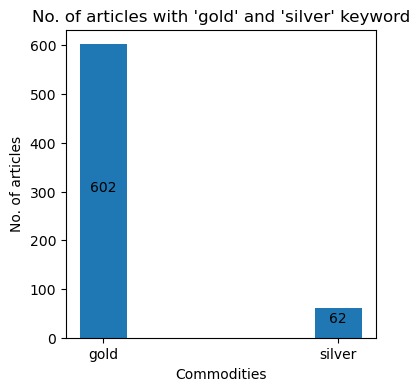

In [9]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

objs = list(counts.keys())
freq = list(counts.values())

fig = plt.figure(figsize=(4, 4))
plt.bar(objs, freq, width=0.2)
addlabels(objs, freq)

plt.xlabel("Commodities")
plt.ylabel("No. of articles")
plt.title("No. of articles with \'gold\' and \'silver\' keyword")
plt.show()

In [10]:
all_gold = df[df['gold'] == True]
all_silver = df[df['silver'] == True]
for a in all_silver['cleaned'][:10]:
    print(a)
    print('\n')

Every post and comment you have ever made was related to persuading people to buy silver


Originally posted by kervio I think the update said median age of the first set of patients was around mid 50s and median age of the later set of patients was around 69 so they would have only had to have put the inclusion criteria in half way through the trial when the evidence was emerging that age was a huge factor in deaths in order to have a successful trial This is the big what if that might have sent the SP to 10 FDA approval lives saved etc We can give them a pass on not knowing that up front for sure because of the speed in which the trial moved forwards on but I think some reactivity would have saved the day here once more was known about covid in the same way that we found out about comorbidities leading to higher rates of death I disagree with this This disease has been totally wacky in respect of different age cohorts and no one has or has had any idea what is going to happen to any 

In [11]:
for a in all_gold['cleaned'][:10]:
    print(a)
    print("\n")

Gold the Tenrec


Tokyo bound Sampson sets Aust rifle record Shooter Dane Sampson has struck career best form as he builds towards a third Olympics setting a national record while winning the 50m rifle event at the South Australia championships Sampson registered a score of 462 points to claim gold in the three positions event The performance bettered Sampson s own national record of 460 7 points which he achieved at last month s Wingfield grand prix The score was also notably higher than what Italy s Niccolo Campriani 458 8 and Poland s Tomasz Bartnik 460 4 produced to win gold at the 2016 Olympics and 2018 world championships respectively It s good to be shooting PBs at this stage It was a world class finals score Sampson said having previously competed at the 2012 and 2016 Olympics You are unlikely to lose many competitions with that score I definitely feel that I am getting better and better and I am tracking well for Tokyo Sampson and other members of Australia s shooting team for

**Question: Check how many articles contain each entity. Can you see any issues with this simple approach?**

*Answer:*

There are a total of 1529 articles. 679 articles contain the string 'gold' and 67 articles contain the string 'silver'. Simple keyword matching has the following issues:

1. Many of the articles matched donot refer to 'gold' or 'silver' as a commodity. This is because the algorithm doesn't use any context (rest of the article) to deduce the usage of gold/silver. E.g. of misleading instances are,
    1. "welcomes new board member, mr. ross silver"
    2. "score of 462 points to claim gold in the three positions event."
    3. "abc gold coast - australia"
    
2. The algorithm does simple syntactic matching and not semantic matching with the keywords. Thus, it's possible that many articles that refer to gold/silver as commodity using a different word/notation maybe missed. E.g., XAU for gold.

3. Many of the retrieved articles refer to the string 'gold'/'silver' in an adjective form, e.g.,
    1. golden years
    2. silver fox

## Task 3

(Misleading instances are mentioned in Task 2)


### 1. Reduce false positive

In [12]:
context = [
    'buy',
    'resource',
    'invest',
    'price',
    'stock',
    'rate',
    'copper',
    'cheap',
    'expensive',
    'currencies',
    'currency',
    'consumer',
    'bought',
    'market',
    'coin',
    'financial',
    'value',
    'money'
]

In [13]:
def contains_gold_silver_with_context(article):
    obj = None

    if 'Gold' in article.split(' ') or 'gold' in article.split(' '):
        obj = GOLD

    if 'Silver' in article.split(' ') or 'silver' in article.split(' '):
        obj =  SILVER

    if obj is not None:
        for word in context:
            if word in article.lower():
                return obj, True

    return None, False

In [14]:
df = df.assign(gold_with_context = False)
df = df.assign(silver_with_context = False)
counts = {GOLD: 0, SILVER: 0}

for ind, article in enumerate(df['cleaned']):
    obj, present = contains_gold_silver_with_context(article)

    if present:
        if obj == GOLD:
            counts[GOLD] += 1
            df.at[ind, 'gold_with_context'] = True
        else:
            counts[SILVER] += 1
            df.at[ind, 'silver_with_context'] = True

df.head(10)

,articles,cleaned,gold,silver,gold_with_context,silver_with_context
0,@fansoniclove Gold the Tenrec\n,Gold the Tenrec,True,False,False,False
1,Tokyo-bound Sampson sets Aust rifle record. Sh...,Tokyo bound Sampson sets Aust rifle record Sho...,True,False,False,False
2,Originally posted by cordingup ↑ I see very in...,Originally posted by cordingup I see very inte...,True,False,True,False
3,"""US 500 Futures Discussions. Hey guys what is ...",US 500 Futures Discussions Hey guys what is go...,True,False,False,False
4,"Good time to invest in gold?""\n",Good time to invest in gold,True,False,True,False
5,Gold edges lower as firmer US yields pinch app...,Gold edges lower as firmer US yields pinch appeal,True,False,False,False
6,What’s your role in AngloGold Ashanti? – Sam J...,What s your role in AngloGold Ashanti Sam Jona...,True,False,True,False
7,"RT @trspartyonline: TRS@20, a journey towards ...",RT TRS a journey towards Golden Telangana Born...,False,False,False,False
8,91.7 ABC Gold Coast - Australia https://t.co/M...,91 7 ABC Gold Coast Australia Australia Misc,True,False,False,False
9,"Gold Futures Discussions. So, any more short p...",Gold Futures Discussions So any more short pap...,True,False,True,False


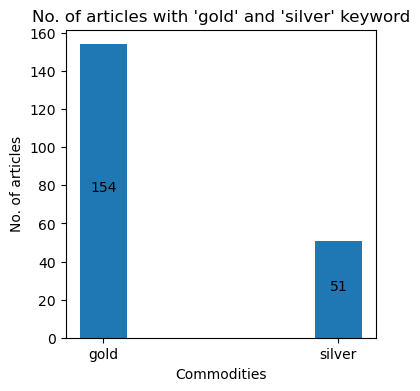

In [15]:
objs = list(counts.keys())
freq = list(counts.values())

fig = plt.figure(figsize=(4, 4))
plt.bar(objs, freq, width=0.2)
addlabels(objs, freq)

plt.xlabel("Commodities")
plt.ylabel("No. of articles")
plt.title("No. of articles with \'gold\' and \'silver\' keyword")
plt.show()

In [16]:
for article in df[df['gold_with_context'] == True]['cleaned'][10:20]:
    print(article)
    print('\n')

Originally posted by robbo24 Did you take a look at the old mine workings in the tenements Plenty of them Expand just noticed that on one of the tenements there is a Nil desperandum lode One of my other gold copper plays has a Nil desperandum target too Hopefully it s a good sign omen Just a completely useless bit of info that excited my superstitious side i would definitely be happy with some similar results from the NXM tenement


Some very old gold POLICIA NACIONAL investigators traced to Calpe a 716 gold coin that was offered for sale online Only 24 of the gold dinars that were minted in Cordoba and amongst the first in circulation following the Moorish conquest of Spain have ever been located Traces of earth found on the coin s surface suggested that it was The post appeared first on Euro Weekly News Spain


Komatsu Consolidated Business Results for the Fiscal Year Ended March 31 2021 U S GAAP Komatsu Ltd Sustainability Promotion Division Corporate Communications Dept Tel 81 0 3 5

### 2. Generalized reduction of false positives

2 solutions
    - to extend spacy
    - to use llm

In [17]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
pd.set_option("display.max_rows", 200)

In [18]:
for article in df[df['gold'] == True]['cleaned'][10:20]:
    doc = nlp(article)
    displacy.render(doc, style="ent")
    print('\n')

In [21]:
for article in df[df['silver'] == True]['cleaned'][:10]:
    doc = nlp(article)
    displacy.render(doc, style="ent")
    print('\n')

/Users/niharika/opt/anaconda3/envs/market/lib/python3.9/site-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


- most of the 'gold' instances in the false positives are organizational entities. the actual gold commodity is not even being recoignized by spacy as any entity. need to extend spacy to identify products/commodities.

- also possible that if entity "money" is present then commodity might be present too. however, may lead to FP, e.g. gold standard is 100 USD.

### Trial with LLM

In [3]:
!pip install spacy-llm
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 5.3 MB/s eta 0:00:00


In [4]:
from wasabi import msg
from spacy_llm.util import assemble

config_path = 'fewshot.cfg'
examples_path = 'examples.yml'
msg.text(f"Loading config from {config_path}", show=True)
nlp = assemble(
    config_path,
    overrides={}
    if examples_path is None
    else {"paths.examples": str(examples_path)},
)

Loading config from fewshot.cfg


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

instruct_pipeline.py:   0%|          | 0.00/9.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/databricks/dolly-v2-3b:
- instruct_pipeline.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/5.68G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

In [31]:
text = "Silver is one of the most desired and useful commodities in the world"
doc = nlp(text)
msg.text(f"Text: {doc.text}")
msg.text(f"Entities: {[(ent.text, ent.label_) for ent in doc.ents]}")

Text: Silver is one of the most desired and useful commodities in the world
Entities: [('Silver', 'SILVER')]


In [25]:
text = "The gold medal was awarded in the “From Harvest to Storage” category for NutriSense TM"
doc = nlp(text)
msg.text(f"Text: {doc.text}")
msg.text(f"Entities: {[(ent.text, ent.label_) for ent in doc.ents]}")

Text: The gold medal was awarded in the “From Harvest to Storage” category for
NutriSense TM
Entities: []


In [36]:
text = "Goldman Sachs is one of the best banks in America"
doc = nlp(text)
msg.text(f"Text: {doc.text}")
msg.text(f"Entities: {[(ent.text, ent.label_) for ent in doc.ents]}")

Text: Goldman Sachs is one of the best banks in America
Entities: []


In [47]:
text = "The price of silver coins and gold jewellery has gone up after lockdown"
doc = nlp(text)
msg.text(f"Text: {doc.text}")
msg.text(f"Entities: {[(ent.text, ent.label_) for ent in doc.ents]}")

Text: The price of silver coins and gold jewellery has gone up after lockdown
Entities: [('gold', 'SILVER')]


In [49]:
text = "The price of silver coins and gold jewellery has gone up after lockdown"
doc = nlp(text)
msg.text(f"Text: {doc.text}")
msg.text(f"Entities: {[(ent.text, ent.label_) for ent in doc.ents]}")

Text: The price of silver coins and gold jewellery has gone up after lockdown
Entities: [('silver', 'SILVER')]


## Task 4

In [22]:
context = [
    'buy',
    'resource',
    'invest',
    'price',
    'stock',
    'rate',
    'cheap',
    'expensive',
    'currencies',
    'currency',
    'consumer',
    'bought',
    'market',
    'coin',
    'financial',
    'value',
    'money'
]

aliases = [
    'yellow metal',
    'bullion',
    'safe haven',
    'store of wealth',
    'hedge against inflation',
    'poor man\'s gold'
]

case_sensitive_aliases = [
    'AU',
    'XAU',
    'XAG'
]

In [23]:
def contains_gold_silver_with_context_and_alias(article):
    obj = None
    
    # Check for alias
    for word in aliases:
        if word in article.lower():
            return 'MISC', True

    for word in case_sensitive_aliases:
        if word in article:
            return 'MISC', True

    if 'Gold' in article.split(' ') or 'gold' in article.split(' '):
        obj = GOLD

    if 'Silver' in article.split(' ') or 'silver' in article.split(' '):
        obj =  SILVER
    
    if obj is not None:
        for word in context:
            if word in article.lower():
                return obj, True
            
    return None, False

In [24]:
df = df.assign(alias = False)
counts = {GOLD: 0, SILVER: 0, 'ALIAS': 0}

for ind, article in enumerate(df['cleaned']):
    obj, present = contains_gold_silver_with_context_and_alias(article)

    if present:
        if obj == GOLD:
            counts[GOLD] += 1
            df.at[ind, 'gold_with_context'] = True
        elif obj == SILVER:
            counts[SILVER] += 1
            df.at[ind, 'silver_with_context'] = True
        else:
            counts['ALIAS'] += 1
            df.at[ind, 'alias'] = True

df.head(10)

,articles,cleaned,gold,silver,gold_with_context,silver_with_context,alias
0,@fansoniclove Gold the Tenrec\n,Gold the Tenrec,True,False,False,False,False
1,Tokyo-bound Sampson sets Aust rifle record. Sh...,Tokyo bound Sampson sets Aust rifle record Sho...,True,False,False,False,False
2,Originally posted by cordingup ↑ I see very in...,Originally posted by cordingup I see very inte...,True,False,True,False,False
3,"""US 500 Futures Discussions. Hey guys what is ...",US 500 Futures Discussions Hey guys what is go...,True,False,False,False,False
4,"Good time to invest in gold?""\n",Good time to invest in gold,True,False,True,False,False
5,Gold edges lower as firmer US yields pinch app...,Gold edges lower as firmer US yields pinch appeal,True,False,False,False,False
6,What’s your role in AngloGold Ashanti? – Sam J...,What s your role in AngloGold Ashanti Sam Jona...,True,False,True,False,False
7,"RT @trspartyonline: TRS@20, a journey towards ...",RT TRS a journey towards Golden Telangana Born...,False,False,False,False,False
8,91.7 ABC Gold Coast - Australia https://t.co/M...,91 7 ABC Gold Coast Australia Australia Misc,True,False,False,False,False
9,"Gold Futures Discussions. So, any more short p...",Gold Futures Discussions So any more short pap...,True,False,True,False,False


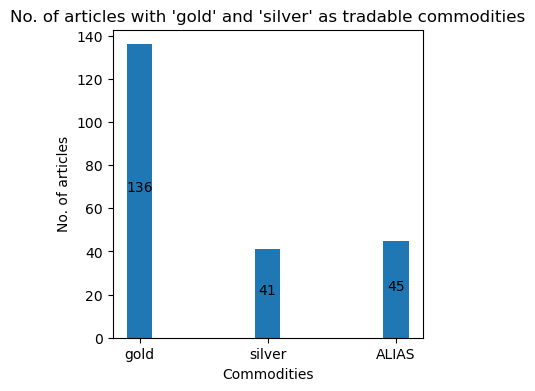

In [25]:
objs = list(counts.keys())
freq = list(counts.values())

fig = plt.figure(figsize=(4, 4))
plt.bar(objs, freq, width=0.2)
addlabels(objs, freq)

plt.xlabel("Commodities")
plt.ylabel("No. of articles")
plt.title("No. of articles with \'gold\' and \'silver\' as tradable commodities")
plt.show()

In [26]:
for article in df[df['alias'] == True]['cleaned']:
    print(article)
    print('\n')

Gold Price News and Forecast XAU USD is trapped in daily support and resistance Posted by EUR Editor in EUR 1 min ago XAU USD struggles below 1 800 amid risk off mood Gold steps back from intraday high while flashing 1 772 as a quote amid Friday s Asian session In doing Read Full Story at source may require registration Latest posts by EUR Editor see all


Gold comments on April 30 2021 XAUUSD PREMIUM comextips2021 goldtips comexsignals signals


XAU USD Discussions Carefull


XAU USD Gold Spot US Dollar Buy Its friday Tp1779 USopening


Newsmaker Cassandra Wingrove heading up sales at Mickey Llew s Australian office Performance marketing and SEO agency Mickey Llew recently appointed Cassandra Wingrove to lead growth and development at its Australian office She has been tasked with developing and coordinating growth opportunities to reach the company s sales objectives of 1 2 AUD R14m She will also provide broad operational day to day support to the team as the Australian offering and 

# Sentiment Analysis

In [38]:
extracted = [
    df[df['gold_with_context'] == True]['cleaned'],
    df[df['silver_with_context'] == True]['cleaned'],
    df[df['alias'] == True]['cleaned']
]

relevant = []
[relevant.extend(el) for el in extracted] 

new_df = pd.DataFrame(relevant, columns=['articles'])
new_df.drop_duplicates(subset='articles', inplace=True, ignore_index=True)

print("No. of articles: ", len(new_df['articles']))
new_df.head()

No. of articles:  226


,articles
0,Originally posted by cordingup I see very inte...
1,Good time to invest in gold
2,What s your role in AngloGold Ashanti Sam Jona...
3,Gold Futures Discussions So any more short pap...
4,APX 1 75 Overbought RSI Trade range 1 40 1 80 ...


In [39]:
# with open('commodities.txt', 'w') as f:
#     for line in relevant:
#         f.write(f"{line}\n\n")

In [59]:
# These words are often used to describe market movements, investor sentiment, and economic conditions.
positive_sentiments = [
    'rise',
    'growth',
    'increase',
    'surge',
    'rally',
    'upturn',
    'boom',
    'bullish',
    'prosperity',
    'expansion'
]

negative_sentiments = [
    'fall',
    'decline',
    'drop',
    'plunge',
    'slump',
    'downturn',
    'bearish',
    'recession',
    'contraction',
    'collapse'
]

In [60]:
new_df = new_df.assign(positive = False)
new_df = new_df.assign(negative = False)
sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

for ind, article in enumerate(new_df['articles']):
    flag = 0
    for word in positive_sentiments:
        if word in article.lower():
            new_df.at[ind, 'positive'] = True
            sentiment_counts['positive'] += 1
            flag = 1
            break
            
    for word in negative_sentiments:
        if word in article.lower():
            new_df.at[ind, 'negative'] = True
            sentiment_counts['negative'] += 1
            flag = 1
            break
            
    if flag == 0:
        sentiment_counts['neutral'] += 1
            
new_df.head(10)

,articles,positive,negative
0,Originally posted by cordingup I see very inte...,False,True
1,Good time to invest in gold,False,False
2,What s your role in AngloGold Ashanti Sam Jona...,False,False
3,Gold Futures Discussions So any more short pap...,False,False
4,APX 1 75 Overbought RSI Trade range 1 40 1 80 ...,False,True
5,Gold Futures Discussions I read somewhere that...,False,False
6,Gold Price News and Forecast XAU USD is trappe...,False,False
7,Ali UBS Yijia Niu D 52614 Bonds and Structured...,False,False
8,RT Bitcoin uses energy like cars gold amp fina...,False,False
9,Re Can Crypto be more valuable than gold BTC i...,False,False


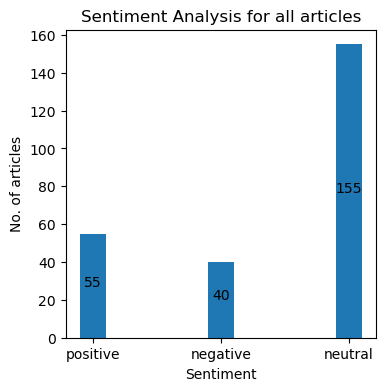

In [61]:
objs = list(sentiment_counts.keys())
freq = list(sentiment_counts.values())

fig = plt.figure(figsize=(4, 4))
plt.bar(objs, freq, width=0.2)
addlabels(objs, freq)

plt.xlabel("Sentiment")
plt.ylabel("No. of articles")
plt.title("Sentiment Analysis for all articles")
plt.show()

In [62]:
overlap = new_df.query('positive == negative and positive == True')['articles']
for o in overlap:
    print(o)
    print('\n')

Komatsu Consolidated Business Results for the Fiscal Year Ended March 31 2021 U S GAAP Komatsu Ltd Sustainability Promotion Division Corporate Communications Dept Tel 81 0 3 5561 2616 Date April 30 2021 URL Consolidated Business Results for the Fiscal Year Ended March 31 2021 U S GAAP 1 Results for the Fiscal Year Ended March 31 2021 Amounts are rounded to the nearest million yen 1 Consolidated Financial Highlights For the fiscal years ended March 31 2021 and 2020 2021 A Net sales 2 189 512 Operating income 167 328 Income before income taxes and equity 162 775 in earnings of affiliated companies Millions of yen except per share amounts 2020 Changes B A B A B B 2 444 870 255 358 10 4 250 707 83 379 33 3 223 114 60 339 27 0 Net income attributable to Komatsu Ltd 106 237 153 844 47 607 30 9 Net income attributable to Komatsu Ltd per share Yen Basic 112 43 162 93 50 50 Diluted 112 39 162 80 50 41 Return on equity 5 8 8 6 2 8 Return on total assets 4 4 6 1 1 7 Return on sales 7 6 10 3 2 7 N

In [63]:
neutral = new_df.query('positive == negative and positive == False')['articles']
for o in neutral[:5]:
    print(o)
    print('\n')

Good time to invest in gold


What s your role in AngloGold Ashanti Sam Jonah questioned After his public address to Rotary Club in Accra Sam Kwesi Esson Jonah KBE has come under immense criticism from persons close to the government who feel that portions of his address attacked the Executive The latest criticism is coming from Paul Adom Otchere host of Good Evening Ghana GEG who in his biweekly show on Metro TV tried to punch holes in the senior stateman s speech According to him Sam Jonah KBE must have had a role in Ashanti Gold which later turned into AngloGold Ashanti therefore he should be able to tell the young people of Ghana the role he played while working with the company On his show Thursday April 29 2021 Adom Otchere stated that if Sam Jonah KBE wants to talk about the future of Ghana then he must first of all open up about his past Sam Jonah cannot come and talk about the future without answering questions about his past it behoves him to make statements about his past If